- 배깅과 페이스팅
    - bagging, bootstrap aggreating의 줄임말
        - 훈련세트에서 중복을 허용하여 샘플링하는 방법
    - 페이스팅
        - 중복을 허용하지 않고 샘플링하는 방법

In [17]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
x,y = make_moons(n_samples=100, noise=0.1, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=int(len(x_train)*0.8),n_jobs=-1, random_state=42)
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=60,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [19]:
x,y

(array([[ 1.58202308, -0.44581483],
        [ 0.0660451 ,  0.4392075 ],
        [ 0.73663111, -0.39896339],
        [-1.05692838,  0.2424558 ],
        [-0.80216162,  0.20271838],
        [-0.70641308,  0.77076218],
        [ 0.2053884 ,  0.81875305],
        [ 1.37804958, -0.44658032],
        [ 0.8481931 ,  0.67172277],
        [ 0.92202981, -0.08438964],
        [ 0.38972996,  0.81785686],
        [-0.33031615,  0.9271263 ],
        [ 1.1673298 , -0.5978882 ],
        [-0.59659735,  0.89753707],
        [ 1.92535861,  0.1831877 ],
        [ 1.12958691,  0.33602789],
        [ 1.12532895, -0.40571607],
        [ 1.09856769, -0.51879837],
        [ 0.57010693,  0.6727978 ],
        [-0.30851921,  0.89344338],
        [-0.02646004,  0.14891397],
        [ 1.83385428, -0.17380486],
        [-0.01103091,  0.86424669],
        [-0.98799936,  0.38321942],
        [ 0.52363988, -0.14410208],
        [ 0.46249008,  0.91166069],
        [-0.90469417,  0.49415615],
        [ 2.01169144,  0.162

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

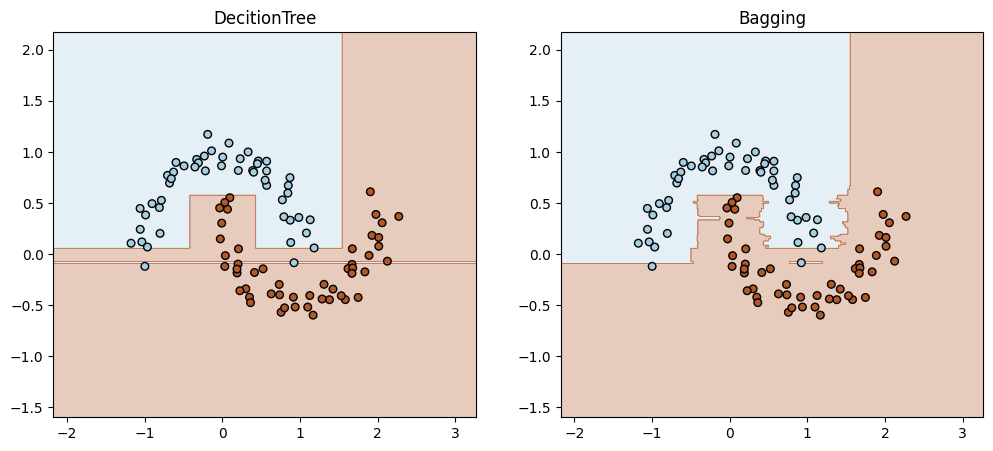

In [21]:
import numpy as np
x_min, x_max = x[:,0].min()-1, x[:,0].max() + 1
y_min, y_max = x[:,1].min()-1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()]) # c_ column stack
z = z.reshape(xx.shape)

zt = tree.predict(np.c_[xx.ravel(), yy.ravel()])
zt = zt.reshape(xx.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('DecitionTree')
plt.contourf(xx,yy,zt,alpha=0.3, cmap = plt.cm.Paired)
plt.scatter(x[:,0], x[:,1],c=y,s=30,cmap=plt.cm.Paired, edgecolor='k')


plt.subplot(1,2,2)
plt.title('Bagging')
plt.contourf(xx,yy,z,alpha=0.3, cmap = plt.cm.Paired)
plt.scatter(x[:,0], x[:,1],c=y,s=30,cmap=plt.cm.Paired, edgecolor='k')

plt.show()

- OOB 평가
    - BaggingClassifier는 기본값으로 중복 허용(bootstrap=True) 훈련세트의 크기만큼 m개 샘플을 선택
    - OOB(out-of-bag) 샘플 - 선택되지 않는 나머지 37%
- OOB_score = True로 지정하면 훈련이 끝난 후에 자동으로 oob 평가 수행

In [22]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, max_samples=int(len(x_train)*0.5),
                            oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(x_train,y_train)
bag_clf.oob_score_

0.8933333333333333

In [23]:
bag_clf.oob_decision_function_[:3] # 처음 3개 샘플에 대한 확률

array([[0.09872611, 0.90127389],
       [0.        , 1.        ],
       [0.69435216, 0.30564784]])

- 랜덤패치, 랜덤 서브스페이스
    - 랜덤패치
        - 훈련특성과 샘플을 모두 샘플링
    - 랜덤 서브스페이스
        - 훈련 샘플을 모두 사용(bootstrap=False 이고 max_samples=1.0)
        - 특성을 샘플링(bootstrap_features=True, 그리고/또는 amx_feature 1.0보다 작게 설정)
            특성을 샘플링 더 다양한 예측기를 만들어서 편향을 늘리는 대신에 분산을 낮추는 효과

랜덤포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=500, n_jobs=-1) # n_jobs=-1 모든 가능한 자원을 다 사용

RandomForestClassifier(n_estimators=500, n_jobs=-1)

- 랜덤포레스트 알고리즘 중에 트리의 노드를 분할할 때 전체 특성중에 최선의 특성을 찾는 대신에 랜덤으로 선택한 특성 후보 중에서 최적의 특성을 찾는 식으로
- (기존 랜덤포레스트에) 무작위성을 더 주는 방식

In [25]:
from sklearn.ensemble import BaggingClassifier
# 기본적으로 sqrt(n) 개의 특성을 선택
BaggingClassifier(max_features='sqrt')

BaggingClassifier(max_features='sqrt')

- 엑스트라 트리
    - 익스트림 랜덤 트리(extremely randomized tree) 앙상블 (줄여서 엑스트라 트리)
        - 극단적으로 랜덤하게 만든 트리의 랜덤포레스트
        - ExtraTreeClassifier를 사용

- 랜덤포레스트의 부수적인 장점
    - 특성의 중요도를 알 수 있다

In [28]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True).data # dataframe 형식으로 나타냄
target = load_iris(as_frame=True).target
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(data, target)
rfc.feature_importances_, data.columns

(array([0.11249225, 0.02311929, 0.44103046, 0.423358  ]),
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'))

In [29]:
data.columns[np.argsort(rfc.feature_importances_)[::-1]]

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

- 부스팅(boosting)
    - 원래는 가설 부스팅(hypothesis boosting)
    - 약한 학습기를 여러개 연결해서 강한 학습기를 만드는 앙상블 기법
    - 가장 인기있는 앙상블 부스팅 AdaBoost(adaptive boosting, 에이다 부스팅), 그레이디언트 부스팅

샘플의 가중치를 업데이트 하면서 순차적으로 학습하는 AdaBoost

In [31]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x,y = make_moons(n_samples=100, noise=0.1, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5, random_state=42
)
ada_clf.fit(x_train,y_train)
print(classification_report(y_test, ada_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
print(classification_report(y_test,tree.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



- AdaBoost 알고리즘 가중치를 업데이트
- 잘못 분류된 샘플의 가중치가 높아짐

- 모든 샘플의 가중치를 정규화(가중치의 합으로 나눠준다)
- 새로운 예측기가 업데이트 된 가중치를 사용해서 훈련하고 전체 과정이 반복
- 가중치의 합이 큰 클래스가 예측한 결과가 최종 결과

- 스태킹
    - 블렌더 또는 메타 학습기

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

sc = StackingClassifier(
    estimators=[
        ('lr',LogisticRegression()),
        ('fr',RandomForestClassifier()),
        ('svc', SVC())
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)
sc.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('fr', RandomForestClassifier()),
                               ('svc', SVC())],
                   final_estimator=RandomForestClassifier(random_state=42))

In [35]:
# 정리
# 앙상블 - 랜덤 포레스트
    # 투표기반 분류기
        # VotingClassifier - 알아서 투표... proba 확률을 가져와서 투표  voting = 'soft'
    # 배깅과 페이스팅
        # 배깅(부트스트랩 == 중복허용) -- oob(out-of-bag) 평가 (랜덤하게 가져오다보면 남게 되어있음, 그 나머지를 테스트로 활용)
        # 페이스팅 (중복 불허)
    # 랜덤 패치와 랜덤 서브스페이스
        # 훈련 특성, 샘플 샘플링
        # 훈련 샘플을 모두 사용(부트스트랩을 false) 하면서 특성을 샘플링

    # 랜덤 포레스트 : 500개의 트리로 이루어진 학습기, 노드분할 랜덤하게 분할 또는 max_feature = 'sqrt' -> 랜덤 대신에 특정 feature에서 최적의 feature를 찾는 방식
        # 무작위성을 더 주입
    # 부스팅 : 여러개의 약한 학습기가 이전 학습기의 가중치를 이어 받아서 학습
    # 스태킹 : 블렌더(섞는다) 여러개의 학습기를 블렌딩하고 최종적으로 배깅 방식의 학습기에 다시 섞어서 출력